In [1]:
import main
from pars_shocks import Pars, Shocks
import plot_inequality as plot_ineq
import time
import importlib
import io_manager
import numpy as np
importlib.reload(plot_ineq)
#run stuff here
start_time = time.perf_counter()
print("Running main")

# ***** may want to change how trans is generated its redundant in do file.
of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/model_uncert/"
age_type_input_path = main_path + "input/50p_age_moms/"
trans_uncond_age_path = age_type_input_path + "MH_trans_uncond_age.csv"

my_lab_fe_grid = np.arange(5.0, 21.0, 0.5)
my_lab_fe_grid = np.log(my_lab_fe_grid)

myPars = main.pars_factory(main_path, my_lab_fe_grid = my_lab_fe_grid)
myPars.H_trans = io_manager.read_and_shape_H_trans_uncond_age(myPars, trans_uncond_age_path)
myPars, myShocks, sols, sims = main.main_io(main_path, myPars = myPars, out_folder_name = of_name, do_dpi_calib = False, output_flag = False)


Running main
Using default health transition matrix
*****Running main_io with default out_folder_name*****
Solver ran in 8.373677300001873 seconds
Calibrating with alpha_lab_targ = 0.33495033, w0_mean_targ = 2.1986368, w0_sd_targ = 0.29955208, 
                                        w1_targ = 0.2915730000000001, w2_targ = 0.2731836000000003, wH_targ = 0.051262233,
                                        dpi_BB_targ = 0.50886095, dpi_GG_targ = 0.34358001
***** Calibration iteration 0 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 1 *****
Calibrating w0_mu
Calibrating w0_sigma
***** Calibration iteration 2 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 3 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 4 *****
Calibrating w0_mu
Calibrating w0_sigma
Calibrating w1
Calibrating w2
***** Calibration iteration 5 *****
Calibrating w0_mu
Calibrating w0_sigma
C

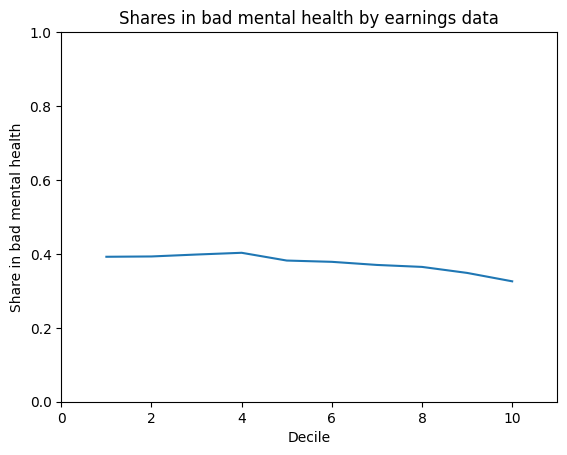

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# data
shares_y_lim: list = [0, 1]

bad_MH_earn_data = pd.read_csv(age_type_input_path + "mean_bad_MH_by_earnings.csv")
decile_x_grid = np.arange(1, 11)
# get second column as numpy array
bad_MH_earn_data = bad_MH_earn_data.to_numpy()[:,1:]
# plot shares in bad health by earnings
fig_bad_MH_earn_data, ax_bad_MH_earn_data = plt.subplots()
ax_bad_MH_earn_data.plot(decile_x_grid, bad_MH_earn_data)
ax_bad_MH_earn_data.set_title("Shares in bad mental health by earnings data")
ax_bad_MH_earn_data.set_xlim([decile_x_grid[0]-1, decile_x_grid[-1]+1])
ax_bad_MH_earn_data.set_ylim(shares_y_lim)
ax_bad_MH_earn_data.set_xlabel("Decile")
ax_bad_MH_earn_data.set_ylabel("Share in bad mental health")
plt.show()

Earnings deciles: [ 360.54077895 1005.8085274  1267.07495718 1524.09194231 1781.7220863
 2048.96736026 2345.19160742 2681.00785157 3073.72438086 3568.75173044
 4791.66934519]
Share of individuals in good health by earnings decile: [0.47675309 0.55705089 0.55393255 0.56683191 0.58712696 0.58979332
 0.59858518 0.60428743 0.61561887 0.76393995]
Share of individuals in bad health by earnings decile: [0.52324691 0.44294911 0.44606745 0.43316809 0.41287304 0.41020668
 0.40141482 0.39571257 0.38438113 0.23606005]


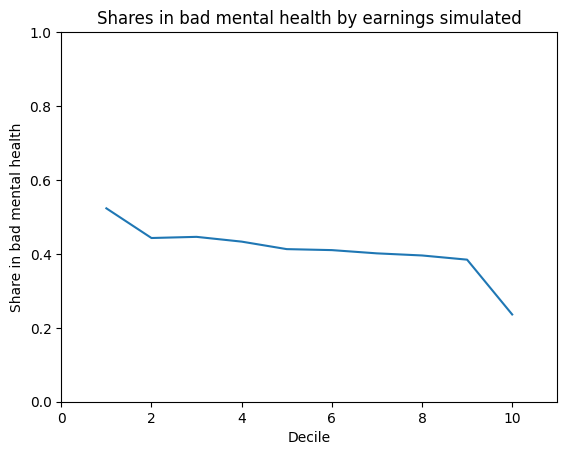

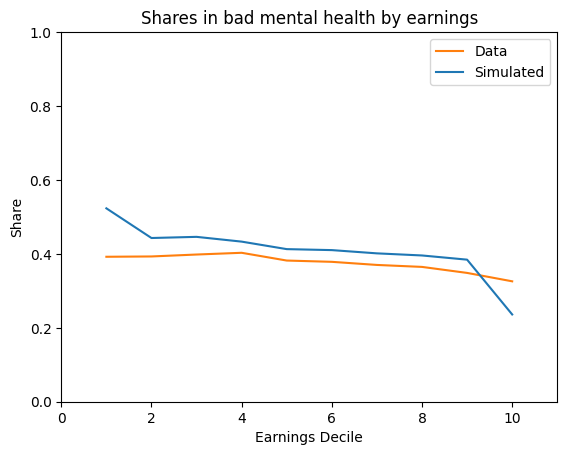

In [3]:
import my_toolbox as tb
import numpy as np



# Step 1: Extract health and earnings histories
H_hist = myShocks.H_hist[:, :, :, :myPars.J]
earnings_sim = sims["lab_earnings"][:, :, :, :myPars.J]

# Step 2: Calculate earnings deciles
earnings_deciles = np.percentile(earnings_sim, np.arange(0, 101, 10))
print("Earnings deciles:", earnings_deciles)

# Step 3: Initialize array to store shares of people in good health (H_hist == 1) by decile
good_MH_by_earn_sim = np.zeros(10)

# Step 4: Loop over deciles to compute the share in good health
for i in range(10):
    if i == 0:
        # First decile: earnings <= first decile threshold
        earnings_mask = (earnings_sim <= earnings_deciles[i + 1])
    else:
        # Subsequent deciles: earnings between decile[i] and decile[i+1]
        earnings_mask = (earnings_sim > earnings_deciles[i]) & (earnings_sim <= earnings_deciles[i + 1])
    
    # Apply the mask to both H_hist and earnings_sim
    good_health_in_decile = H_hist[earnings_mask]
    
    # Calculate the share of individuals in good health for this decile
    good_MH_by_earn_sim[i] = np.mean(good_health_in_decile)

bad_MH_by_earn_sim = 1 - good_MH_by_earn_sim    
# Step 5: Print the results
print("Share of individuals in good health by earnings decile:", good_MH_by_earn_sim)
print("Share of individuals in bad health by earnings decile:", bad_MH_by_earn_sim)

# plot
fig_bad_MH_earn_sim, ax_bad_MH_earn_sim = plt.subplots()
ax_bad_MH_earn_sim.plot(decile_x_grid, bad_MH_by_earn_sim)
ax_bad_MH_earn_sim.set_title("Shares in bad mental health by earnings simulated")
ax_bad_MH_earn_sim.set_xlim([decile_x_grid[0]-1, decile_x_grid[-1]+1])
ax_bad_MH_earn_sim.set_ylim(shares_y_lim)
ax_bad_MH_earn_sim.set_xlabel("Decile")
ax_bad_MH_earn_sim.set_ylabel("Share in bad mental health")
plt.show()

color_list = ["C1", "C0"]
label_lists = [["Data"], ["Simulated"]]


# combine
save_path = main_path + "output/autocorr_figs/"
fig_comb_bad_MH_earn, ax_comb_bad_MH_earn = tb.combine_plots([(fig_bad_MH_earn_data, ax_bad_MH_earn_data), (fig_bad_MH_earn_sim, ax_bad_MH_earn_sim)],
                                                    comb_fig_title = "Shares in bad mental health by earnings", x_label = "Earnings Decile", y_label = "Share", 
                                                    label_lists = label_lists, colors= color_list, 
                                                    save_path = save_path + "shares_bad_MH_earn_mtypes.pdf")